<a href="https://colab.research.google.com/github/mafenavas/challenge_telecom_X/blob/main/challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción #

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import pandas as pd

In [110]:
raw_data= pd.read_json('/content/drive/MyDrive/Alura Latam/Oracle ONE Next Education/Data Science/TelecomX_Data.json')

In [111]:
raw_data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación #

##1. Explorar las columnas del dataset y verificar sus tipos de datos.##

In [112]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## 2.  Consultar el diccionario para comprender mejor el significado de las variables. 3.  Identificar las columnas más relevantes para el análisis de evasión. ##

In [113]:
raw_data.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

## 4. verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. ##

In [114]:
import pandas as pd

In [115]:
normalized_data_1 = pd.json_normalize(raw_data['customer'])
normalized_data_2 = pd.json_normalize(raw_data['phone'])
normalized_data_3 = pd.json_normalize(raw_data['internet'])
normalized_data_4 = pd.json_normalize(raw_data['account'])
normalized_data = pd.concat([raw_data['customerID'], raw_data['Churn'], normalized_data_1,normalized_data_2, normalized_data_3, normalized_data_4 ], axis=1)

normalized_data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [116]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [117]:
import numpy as np

In [118]:
normalized_data.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [119]:
normalized_data['Cuentas_diarias'] = normalized_data['Charges.Monthly']/30
normalized_data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [120]:
normalized_data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [121]:
normalized_data.describe()

,SeniorCitizen,tenure,Charges.Monthly,Cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157337
std,0.369074,24.571773,30.129572,1.004319
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.425000,1.180833
50%,0.000000,29.000000,70.300000,2.343333
75%,0.000000,55.000000,89.875000,2.995833
max,1.000000,72.000000,118.750000,3.958333


In [122]:
import numpy as np

In [123]:
gold_data = normalized_data.copy(deep=True)

gold_data['Churn'] = (normalized_data['Churn'] == 'Yes').astype(np.bool)
gold_data['SeniorCitizen'] = normalized_data['SeniorCitizen'].astype(np.bool)
gold_data['Partner'] = normalized_data['Partner'].astype(np.bool)
gold_data['Dependents'] = normalized_data['Dependents'].astype(np.bool)
gold_data['MultipleLines'] = normalized_data['MultipleLines'].astype(np.bool)
gold_data['OnlineSecurity'] = normalized_data['OnlineSecurity'].astype(np.bool)
gold_data['OnlineBackup'] = normalized_data['OnlineBackup'].astype(np.bool)
gold_data['DeviceProtection'] = normalized_data['DeviceProtection'].astype(np.bool)
gold_data['TechSupport'] = normalized_data['TechSupport'].astype(np.bool)
gold_data['StreamingTV'] = normalized_data['StreamingTV'].astype(np.bool)
gold_data['StreamingMovies'] = normalized_data['StreamingMovies'].astype(np.bool)
gold_data['PaperlessBilling'] = normalized_data['PaperlessBilling'].astype(np.bool)
gold_data['PhoneService'] = normalized_data['PhoneService'].astype(np.bool)

gold_data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,True,DSL,...,True,True,True,True,One year,True,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,False,Male,False,True,True,9,True,True,DSL,...,True,True,True,True,Month-to-month,True,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,True,Male,False,True,True,4,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,True,13,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,True,3,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,True,True,13,True,True,DSL,...,True,True,True,True,One year,True,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,True,Male,False,True,True,22,True,True,Fiber optic,...,True,True,True,True,Month-to-month,True,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,False,Male,False,True,True,2,True,True,DSL,...,True,True,True,True,Month-to-month,True,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,False,Male,False,True,True,67,True,True,DSL,...,True,True,True,True,Two year,True,Mailed check,67.85,4627.65,2.261667


In [124]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [125]:
churn = gold_data.groupby('Churn').count()
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
Churn,,,,,,,,,,,,,,,,,,,,,
False,5398,5398,5398,5398,5398,5398,5398,5398,5398,5398,...,5398,5398,5398,5398,5398,5398,5398,5398,5398,5398
True,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,...,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


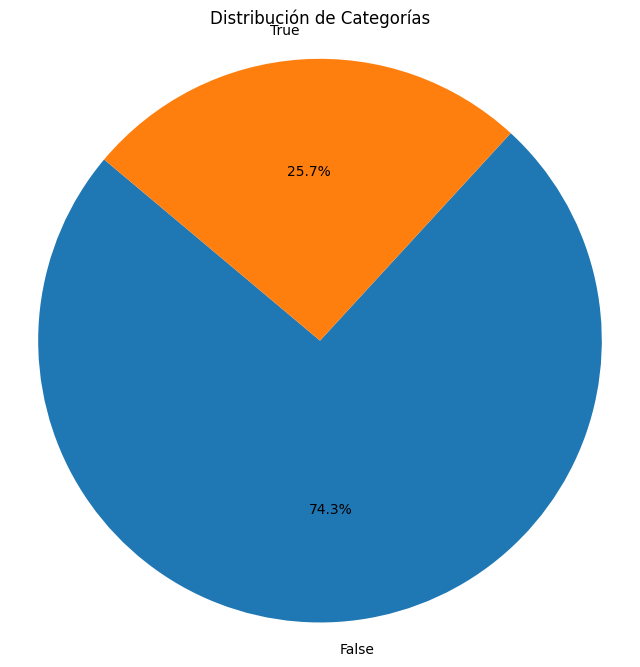

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))  # Opcional: Ajustar el tamaño del gráfico
plt.pie(churn['gender'], labels=churn.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Categorías')  # Opcional: Añadir un título
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

## Distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

In [127]:
churn_gender_True = gold_data[gold_data['Churn']== True].groupby('gender').count()
churn_gender_True

,customerID,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
gender,,,,,,,,,,,,,,,,,,,,,
Female,939,939,939,939,939,939,939,939,939,939,...,939,939,939,939,939,939,939,939,939,939
Male,930,930,930,930,930,930,930,930,930,930,...,930,930,930,930,930,930,930,930,930,930


In [128]:
churn_gender_False = gold_data[gold_data['Churn']== False].groupby('gender').count()
churn_gender_False

,customerID,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
gender,,,,,,,,,,,,,,,,,,,,,
Female,2653,2653,2653,2653,2653,2653,2653,2653,2653,2653,...,2653,2653,2653,2653,2653,2653,2653,2653,2653,2653
Male,2745,2745,2745,2745,2745,2745,2745,2745,2745,2745,...,2745,2745,2745,2745,2745,2745,2745,2745,2745,2745


In [129]:
churn_InternetService_True = gold_data[gold_data['Churn']== True].groupby('InternetService').count()
churn_InternetService_True

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
InternetService,,,,,,,,,,,,,,,,,,,,,
DSL,459,459,459,459,459,459,459,459,459,459,...,459,459,459,459,459,459,459,459,459,459
Fiber optic,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297,...,1297,1297,1297,1297,1297,1297,1297,1297,1297,1297
No,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113


In [130]:
churn_InternetService_False = gold_data[gold_data['Churn']== False].groupby('InternetService').count()
churn_InternetService_False

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
InternetService,,,,,,,,,,,,,,,,,,,,,
DSL,2029,2029,2029,2029,2029,2029,2029,2029,2029,2029,...,2029,2029,2029,2029,2029,2029,2029,2029,2029,2029
Fiber optic,1901,1901,1901,1901,1901,1901,1901,1901,1901,1901,...,1901,1901,1901,1901,1901,1901,1901,1901,1901,1901
No,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468,...,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468


In [131]:
churn_Contract_True = gold_data[gold_data['Churn']== True].groupby('Contract').count()
churn_Contract_True

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
Contract,,,,,,,,,,,,,,,,,,,,,
Month-to-month,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655,...,1655,1655,1655,1655,1655,1655,1655,1655,1655,1655
One year,166,166,166,166,166,166,166,166,166,166,...,166,166,166,166,166,166,166,166,166,166
Two year,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


In [132]:
churn_Contract_False = gold_data[gold_data['Churn']== False].groupby('Contract').count()
churn_Contract_False

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
Contract,,,,,,,,,,,,,,,,,,,,,
Month-to-month,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,...,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
One year,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,...,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353
Two year,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,...,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695


In [133]:
churn_PaymentMethod_True = gold_data[gold_data['Churn']== True].groupby('PaymentMethod').count()
churn_PaymentMethod_True

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_diarias
PaymentMethod,,,,,,,,,,,,,,,,,,,,,
Bank transfer (automatic),258,258,258,258,258,258,258,258,258,258,...,258,258,258,258,258,258,258,258,258,258
Credit card (automatic),232,232,232,232,232,232,232,232,232,232,...,232,232,232,232,232,232,232,232,232,232
Electronic check,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,...,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071
Mailed check,308,308,308,308,308,308,308,308,308,308,...,308,308,308,308,308,308,308,308,308,308


In [134]:
churn_PaymentMethod_False = gold_data[gold_data['Churn']== False].groupby('PaymentMethod').count()
churn_PaymentMethod_False

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_diarias
PaymentMethod,,,,,,,,,,,,,,,,,,,,,
Bank transfer (automatic),1331,1331,1331,1331,1331,1331,1331,1331,1331,1331,...,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331
Credit card (automatic),1336,1336,1336,1336,1336,1336,1336,1336,1336,1336,...,1336,1336,1336,1336,1336,1336,1336,1336,1336,1336
Electronic check,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,...,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374
Mailed check,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357,...,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357


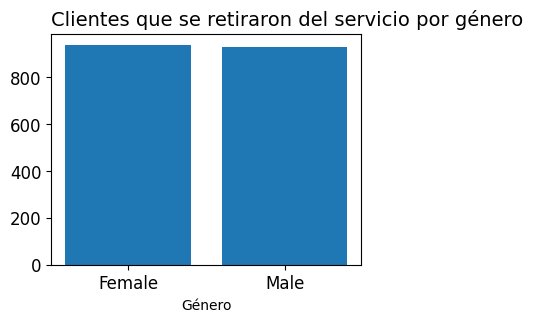

In [135]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(churn_gender_True.index, churn_gender_True['Churn'])
ax.set_title('Clientes que se retiraron del servicio por género', loc='left', fontsize=14)
ax.set_xlabel('Género')
ax.set_ylabel('', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

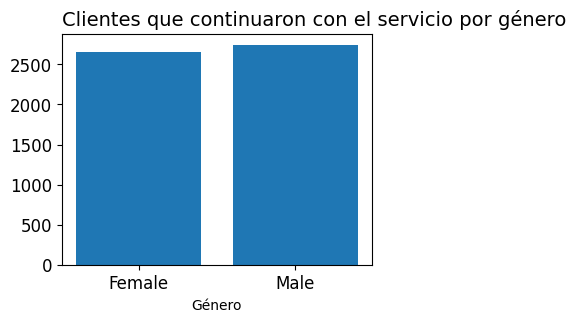

In [136]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(churn_gender_False.index, churn_gender_False['Churn'])
ax.set_title('Clientes que continuaron con el servicio por género', loc='left', fontsize=14)
ax.set_xlabel('Género')
ax.set_ylabel('', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

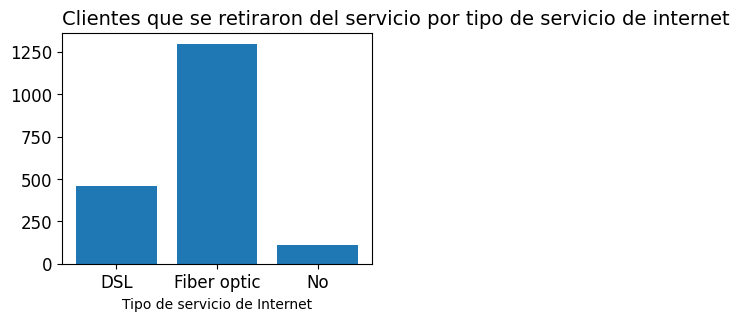

In [137]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(churn_InternetService_True.index, churn_InternetService_True['Churn'])
ax.set_title('Clientes que se retiraron del servicio por tipo de servicio de internet', loc='left', fontsize=14)
ax.set_xlabel('Tipo de servicio de Internet')
ax.set_ylabel('', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

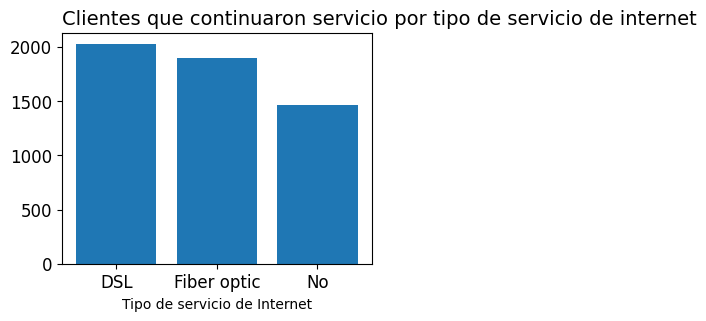

In [138]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(churn_InternetService_False.index, churn_InternetService_False['Churn'])
ax.set_title('Clientes que continuaron servicio por tipo de servicio de internet', loc='left', fontsize=14)
ax.set_xlabel('Tipo de servicio de Internet')
ax.set_ylabel('', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

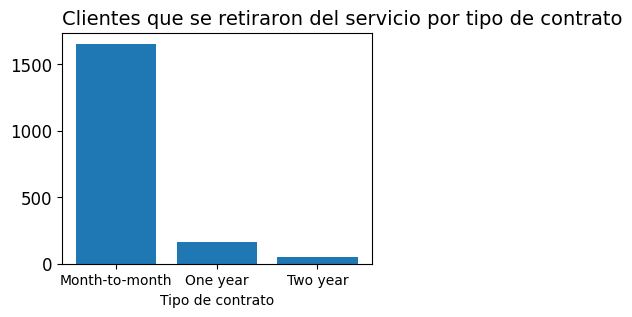

In [139]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(churn_Contract_True.index, churn_Contract_True['Churn'])
ax.set_title('Clientes que se retiraron del servicio por tipo de contrato', loc='left', fontsize=14)
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('', fontsize=14)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

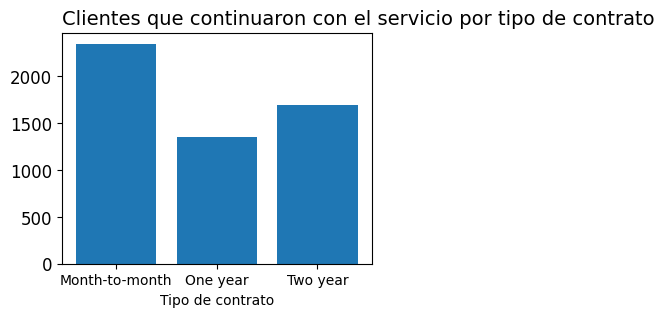

In [140]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(churn_Contract_False.index, churn_Contract_False['Churn'])
ax.set_title('Clientes que continuaron con el servicio por tipo de contrato', loc='left', fontsize=14)
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('', fontsize=14)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

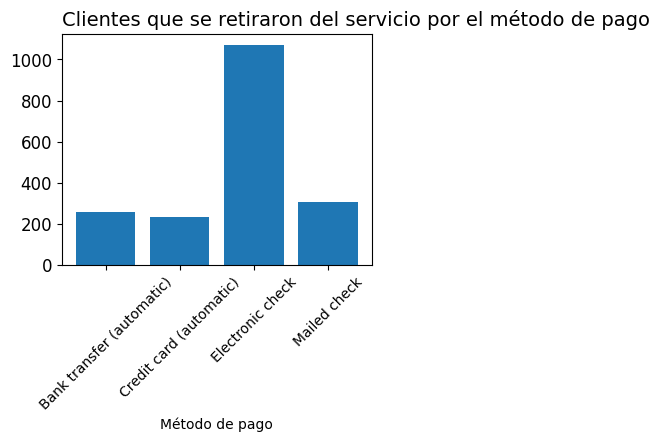

In [141]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(churn_PaymentMethod_True.index, churn_PaymentMethod_True['Churn'])
ax.set_title('Clientes que se retiraron del servicio por el método de pago', loc='left', fontsize=14)
ax.set_xlabel('Método de pago')
ax.set_ylabel('', fontsize=14)
ax.xaxis.set_tick_params(labelsize=10, rotation =45)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

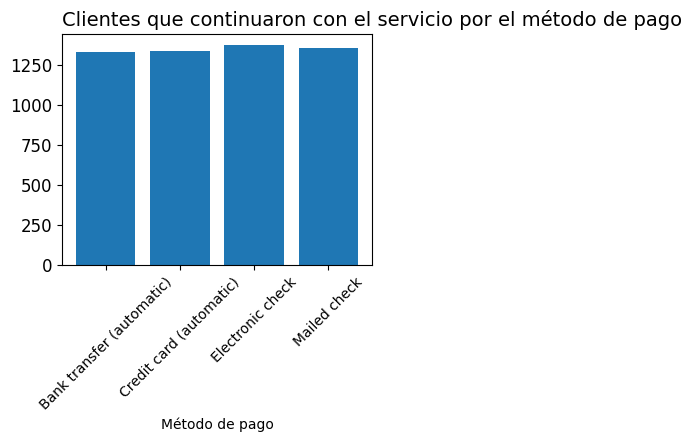

In [142]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(churn_PaymentMethod_False.index, churn_PaymentMethod_False['Churn'])
ax.set_title('Clientes que continuaron con el servicio por el método de pago', loc='left', fontsize=14)
ax.set_xlabel('Método de pago')
ax.set_ylabel('', fontsize=14)
ax.xaxis.set_tick_params(labelsize=10, rotation =45)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

## Explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

In [143]:
churn_tenure_True = gold_data[gold_data['Churn']== True].groupby('tenure').count()
churn_tenure_True

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
tenure,,,,,,,,,,,,,,,,,,,,,
1,380,380,380,380,380,380,380,380,380,380,...,380,380,380,380,380,380,380,380,380,380
2,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
3,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
4,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
5,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
69,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
70,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [144]:
churn_tenure_False = gold_data[gold_data['Churn']== False].groupby('tenure').count()
churn_tenure_False

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
tenure,,,,,,,,,,,,,,,,,,,,,
0,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
1,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
2,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
3,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
4,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
69,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
70,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111


In [145]:
import plotly.express as px

In [146]:
fig =px.line(gold_data, x=churn_tenure_True.index, y=churn_tenure_True['Churn'], title ='Clientes que se retiraron del servicio de acuerdo al tiempo de contrato')

fig.update_traces(line_color='green', line_width=3)
fig.update_layout(width=800,height=400, xaxis={'tickangle':-45},
                  xaxis_title='Número de meses', yaxis_title='Número de clientes',
                  font_family='Arial', font_size=14, font_color='grey')
fig.show()

In [147]:
fig =px.line(gold_data, x=churn_tenure_False.index, y=churn_tenure_False['Churn'], title ='Clientes que continuaron con el servicio de acuerdo al tiempo de contrato')

fig.update_traces(line_color='green', line_width=3)
fig.update_layout(width=800,height=400, xaxis={'tickangle':-45},
                  xaxis_title='Número de meses', yaxis_title='Número de clientes',
                  font_family='Arial', font_size=14, font_color='grey')
fig.show()

In [148]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [149]:
normalized_data[normalized_data['Charges.Total'] == ""]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias


In [150]:
gold_data['Charges.Total'] = normalized_data[normalized_data['Charges.Total'] != " "]['Charges.Total'].astype(float)

In [151]:
gold_data['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


#📄Informe final